In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
from pylab import legend
from pylab import plot, show
from pylab import axis
from pylab import title, xlabel, ylabel

In [26]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [2]:
data = pd.read_csv('지하철(2018).csv', engine = 'python')

In [3]:
data.head()

,위치,시설명(역사명),PM-10 (㎍/㎥),CO2 (ppm),HCHO (㎍/㎥),CO(ppm)
0,인천,박촌,132.1,475,8.8,0.4
1,인천,임학,52.4,443,7.2,0.5
2,인천,계산,30.5,430,5.8,0.4
3,인천,경인교대,45.8,470,7.2,0.5
4,인천,작 전,39.9,719,14.0,0.7


- PM-10 : 미세먼지 즉, 눈에 보이지 않을 정도로 입자가 작은 먼지를 뜻하며, 대기 중 장기간 떠다니는 입경 10㎛ 이하의 미세한 먼지이다.
- CO2 : 이산화탄소
- HCHO : 폼알데하이드로 자극성이 강한 냄새를 띈 기체상의 화학물질이다. 메탄알이라고도 한다.
- CO : 일산화탄소

In [65]:
data = data.rename(columns={'PM-10 (㎍/㎥)':'PM-10',
                           'CO2 (ppm)':'CO2',
                           'HCHO (㎍/㎥)':'HCHO',
                           'CO(ppm)':'CO'})
data.head()

,위치,시설명(역사명),PM-10,CO2,HCHO,CO
0,인천,박촌,132.1,475,8.8,0.4
1,인천,임학,52.4,443,7.2,0.5
2,인천,계산,30.5,430,5.8,0.4
3,인천,경인교대,45.8,470,7.2,0.5
4,인천,작 전,39.9,719,14.0,0.7


In [66]:
data.info()

# PM-10~CO까지의 변수는 수치형임을 알 수 있다.(정수 OR 실수)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
위치          94 non-null object
시설명(역사명)    94 non-null object
PM-10       94 non-null float64
CO2         94 non-null int64
HCHO        94 non-null float64
CO          94 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.5+ KB


In [67]:
data.describe()

,PM-10,CO2,HCHO,CO
count,94.000000,94.000000,94.000000,94.000000
mean,45.757447,490.648936,5.017021,0.506383
std,13.818707,66.875057,2.770219,0.344483
min,21.200000,390.000000,0.900000,0.100000
25%,40.475000,442.250000,3.225000,0.400000
50%,45.900000,473.000000,4.550000,0.500000
75%,48.675000,516.000000,6.375000,0.600000
max,132.100000,719.000000,14.000000,3.300000


In [68]:
data.groupby('위치').mean()

,PM-10,CO2,HCHO,CO
위치,,,,
대구,44.026984,486.174603,3.701587,0.487302
부산,48.725000,416.000000,8.900000,0.800000
인천,49.355556,512.148148,7.511111,0.507407


크게 [대구, 부산, 인천]으로 나눠봤을 때 우리는 아래의 사실들을 대충 알 수 있다.
- PM-10 : 대구 < 부산 < 인천
- CO2   : 부산 < 대구 < 인천
- HCHO  : 대구 < 인천 < 부산
- CO    : 대구 < 인천 < 부산

즉, 대구에서 공기질이 제일 좋고, 부산과 인천의 공기질이 나쁘다고 추측 할 수 있다.

In [69]:
df1 = data[data['위치'] == '인천']
df2 = data[data['위치'] == '대구']
df3 = data[data['위치'] == '부산']

In [70]:
df1.head()

,위치,시설명(역사명),PM-10,CO2,HCHO,CO
0,인천,박촌,132.1,475,8.8,0.4
1,인천,임학,52.4,443,7.2,0.5
2,인천,계산,30.5,430,5.8,0.4
3,인천,경인교대,45.8,470,7.2,0.5
4,인천,작 전,39.9,719,14.0,0.7


In [71]:
df2.head()

,위치,시설명(역사명),PM-10,CO2,HCHO,CO
27,대구,설화명곡,39.0,471,3.8,0.4
28,대구,화원,38.9,511,4.5,0.4
29,대구,대곡역,46.7,520,3.0,0.7
30,대구,진천역,46.8,516,3.5,0.7
31,대구,월배역,48.8,521,6.1,0.4


In [72]:
df3

,위치,시설명(역사명),PM-10,CO2,HCHO,CO
90,부산,1호선,49.8,417,8.1,0.9
91,부산,2호선,49.9,415,7.8,0.8
92,부산,3호선,49.9,442,8.3,0.8
93,부산,4호선,45.3,390,11.4,0.7


In [73]:
data.head()

,위치,시설명(역사명),PM-10,CO2,HCHO,CO
0,인천,박촌,132.1,475,8.8,0.4
1,인천,임학,52.4,443,7.2,0.5
2,인천,계산,30.5,430,5.8,0.4
3,인천,경인교대,45.8,470,7.2,0.5
4,인천,작 전,39.9,719,14.0,0.7


In [74]:
x = ['인천', '대구', '부산']
d1 = round(df1['PM-10'].mean(),2)
d2 = round(df2['PM-10'].mean(),2)
d3 = round(df3['PM-10'].mean(),2)
y = [d1, d2, d3]
c1 = round(df1['CO2'].mean(),2)
c2 = round(df2['CO2'].mean(),2)
c3 = round(df3['CO2'].mean(),2)
z = [c1, c2, c3]
b1 = round(df1['HCHO'].mean(),2)
b2 = round(df2['HCHO'].mean(),2)
b3 = round(df3['HCHO'].mean(),2)
w = [b1, b2, b3]
a1 = round(df1['CO'].mean(),2)
a2 = round(df2['CO'].mean(),2)
a3 = round(df3['CO'].mean(),2)
t = [a1, a2, a3]
print(y)

[49.36, 44.03, 48.72]


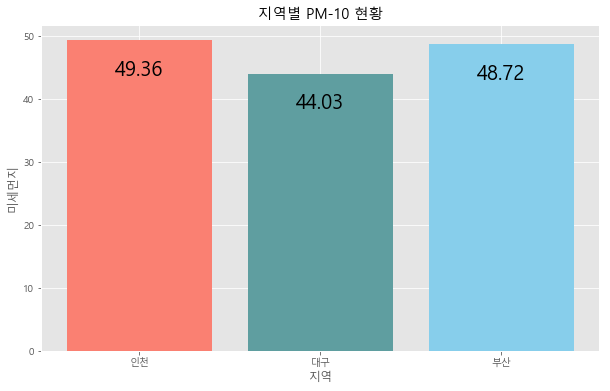

In [91]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
colors = ['salmon', 'cadetblue', 'skyblue']

plt.bar(x,y, color=colors)
plt.title('지역별 PM-10 현황')
plt.xlabel('지역')
plt.ylabel('미세먼지')
for i in range(len(y)):
    str_val = y[i]
    plt.text(i, y[i]-3, str_val, fontsize=20, color='black',
                ha='center', va='top')
 
plt.show()

## 인천, 부산에서 가장 많음을 알 수 있다.

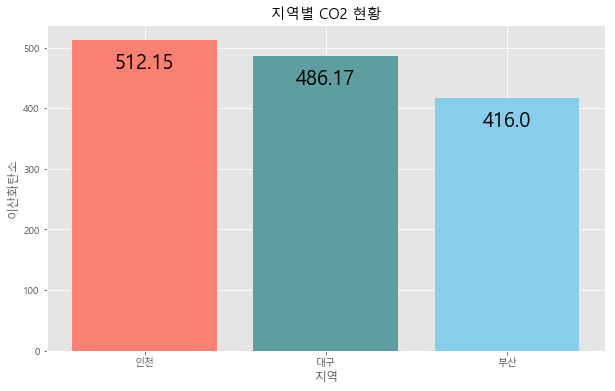

In [101]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
colors = ['salmon', 'cadetblue', 'skyblue']

plt.bar(x,z, color=colors)
plt.title('지역별 CO2 현황')
plt.xlabel('지역')
plt.ylabel('이산화탄소')

for i in range(len(z)):
    str_val = z[i]
    plt.text(i, z[i]-20, str_val, fontsize=20, color='black',
                ha='center', va='top')
 
plt.show()

## 인천, 부산에서 가장 많음을 알 수 있다.

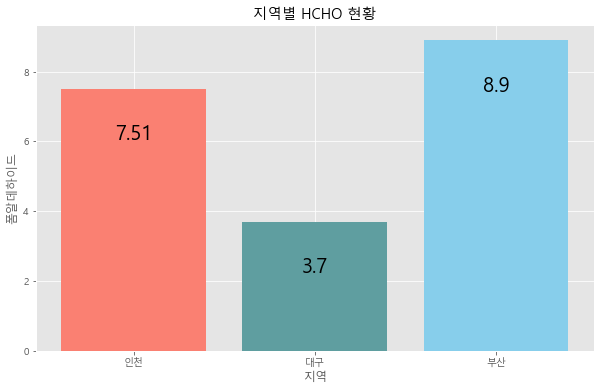

In [96]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
colors = ['salmon', 'cadetblue', 'skyblue']

plt.bar(x,w, color=colors)
plt.title('지역별 HCHO 현황')
plt.xlabel('지역')
plt.ylabel('폼알데하이드')

for i in range(len(w)):
    str_val = w[i]
    plt.text(i, w[i]-1, str_val, fontsize=20, color='black',
                ha='center', va='top')
 
plt.show()

## 인천, 부산에서 가장 많음을 알 수 있다.

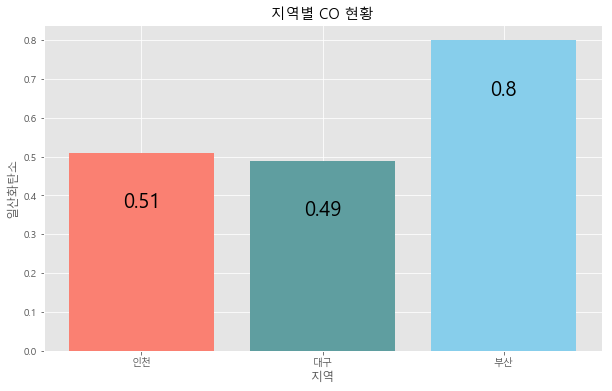

In [100]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
colors = ['salmon', 'cadetblue', 'skyblue']

plt.bar(x,t, color=colors)
plt.title('지역별 CO 현황')
plt.xlabel('지역')
plt.ylabel('일산화탄소')

for i in range(len(t)):
    str_val = t[i]
    plt.text(i, t[i]-0.1, str_val, fontsize=20, color='black',
                ha='center', va='top')
 
plt.show()

## 인천, 부산에서 가장 많음을 알 수 있다.

In [79]:
df3

,위치,시설명(역사명),PM-10,CO2,HCHO,CO
90,부산,1호선,49.8,417,8.1,0.9
91,부산,2호선,49.9,415,7.8,0.8
92,부산,3호선,49.9,442,8.3,0.8
93,부산,4호선,45.3,390,11.4,0.7


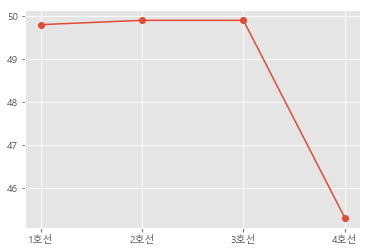

In [113]:
space = ['1호선', '2호선', '3호선', '4호선']
pm = df3['PM-10']
co2 = df3['CO2']
hcho = df3['HCHO']
co = df3['CO']

plot(space, pm, marker="o")